In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

In [2]:
INALT_mask = xr.open_dataset('/gxfs_work1/geomar/smomw044/prep_data_iAtlantic_LMock/INALT20.L46-KFS119/1_INALT20.L46-KFS119_mesh_mask_iMirabilis.nc')
SIGMA = xr.open_dataset('/gxfs_work1/geomar/smomw523/master-thesis/data/config/ROMS/sigma2depth_parent.nc')

In [3]:
topo_INALT = np.sum((INALT_mask.tmask*INALT_mask.e3t_0).isel(t=0),axis=0)

In [4]:
def fmt(x):
    s = f"{x:.1f}"
    if s.endswith("0"):
        s = f"{x:.0f}"
    return rf"{s}" if plt.rcParams["text.usetex"] else f"{s}"

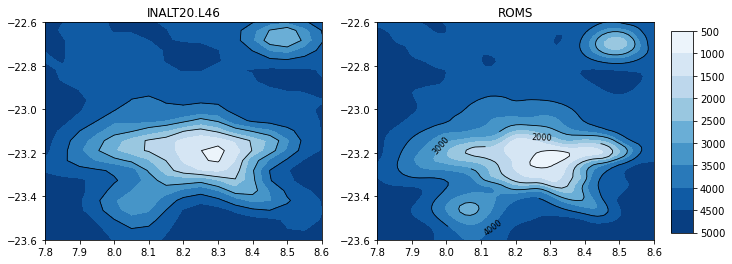

In [5]:
fig=plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('INALT20.L46')
cf_INALT = plt.contourf(INALT_mask.glamt[0,0,:],INALT_mask.gphit[0,:,0],topo_INALT,levels=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000],cmap='Blues')
c_INALT = plt.contour(INALT_mask.glamt[0,0,:],INALT_mask.gphit[0,:,0],topo_INALT,levels=[1000,2000,3000,4000,5000],colors='black',linewidths=0.8)
plt.clabel(c_INALT, c_INALT.levels, inline=True, fontsize=8,fmt=fmt)
plt.xlim([7.8,8.6])
plt.ylim([-23.6,-22.6])

plt.subplot(1,2,2)
plt.title('ROMS')
cf_ROMS = plt.contourf(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,levels=[500,1000,1500,2000,2500,3000,3500,4000,4500,5000],cmap='Blues')
c_ROMS = plt.contour(SIGMA.lon_rho,SIGMA.lat_rho,SIGMA.h,levels=[1000,2000,3000,4000,5000],colors='black',linewidths=0.8)
plt.clabel(c_ROMS, c_ROMS.levels, inline=True, fontsize=8,fmt=fmt)
plt.xlim([7.8,8.6])
plt.ylim([-23.6,-22.6])

fig.subplots_adjust(right=0.83)
cbar_ax = fig.add_axes([0.85, 0.15, 0.025, 0.7])
cb=fig.colorbar(cf_ROMS, cax=cbar_ax)
cb.ax.invert_yaxis()